
# Lab 6
*   20246826 - Bella Elisabet Perales Melendez y Alcocer
*   20206331 - Ricardo Sebastian Alexander Bravo Wong
*   20175686 - Rey Susanibar Sebastian Fabrizio
*   20172633 - Sergio Leonardo Tello Arroyo

# Análisis Exploratorio de Datos de Bienes Raíces

Este notebook realiza un análisis exploratorio de datos (EDA) en un dataset de propiedades inmobiliarias, que incluye variables como precio, tamaño en pies cuadrados, número de habitaciones, baños, entre otros factores relevantes. El objetivo es explorar las características principales de las propiedades, detectar y tratar outliers para mejorar la calidad de los datos y preparar el dataset para análisis posteriores.

Se aplican técnicas de estadística descriptiva y visualización para comprender la distribución de cada variable y el posible impacto de los outliers en el análisis. También se utilizan métodos de detección y eliminación de outliers, incluyendo el rango intercuartílico (IQR) y el método de desviación estándar, para mejorar la precisión del análisis y de los modelos predictivos futuros.




In [2]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Download latest version
path = kagglehub.dataset_download("harlfoxem/housesalesprediction")

print("Path to dataset files:", path)

df = pd.read_csv(path + "/kc_house_data.csv")
#print(df.head())

print("Dimensiones del dataset:", df.shape)

100%|██████████| 780k/780k [00:00<00:00, 1.20MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/harlfoxem/housesalesprediction/versions/1
Dimensiones del dataset: (21613, 21)


In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
print("Valores nulos:")
print(df.isnull().sum())

Valores nulos:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


El dataset no contiene nulos lo cual facilita el preprocesamiento

In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

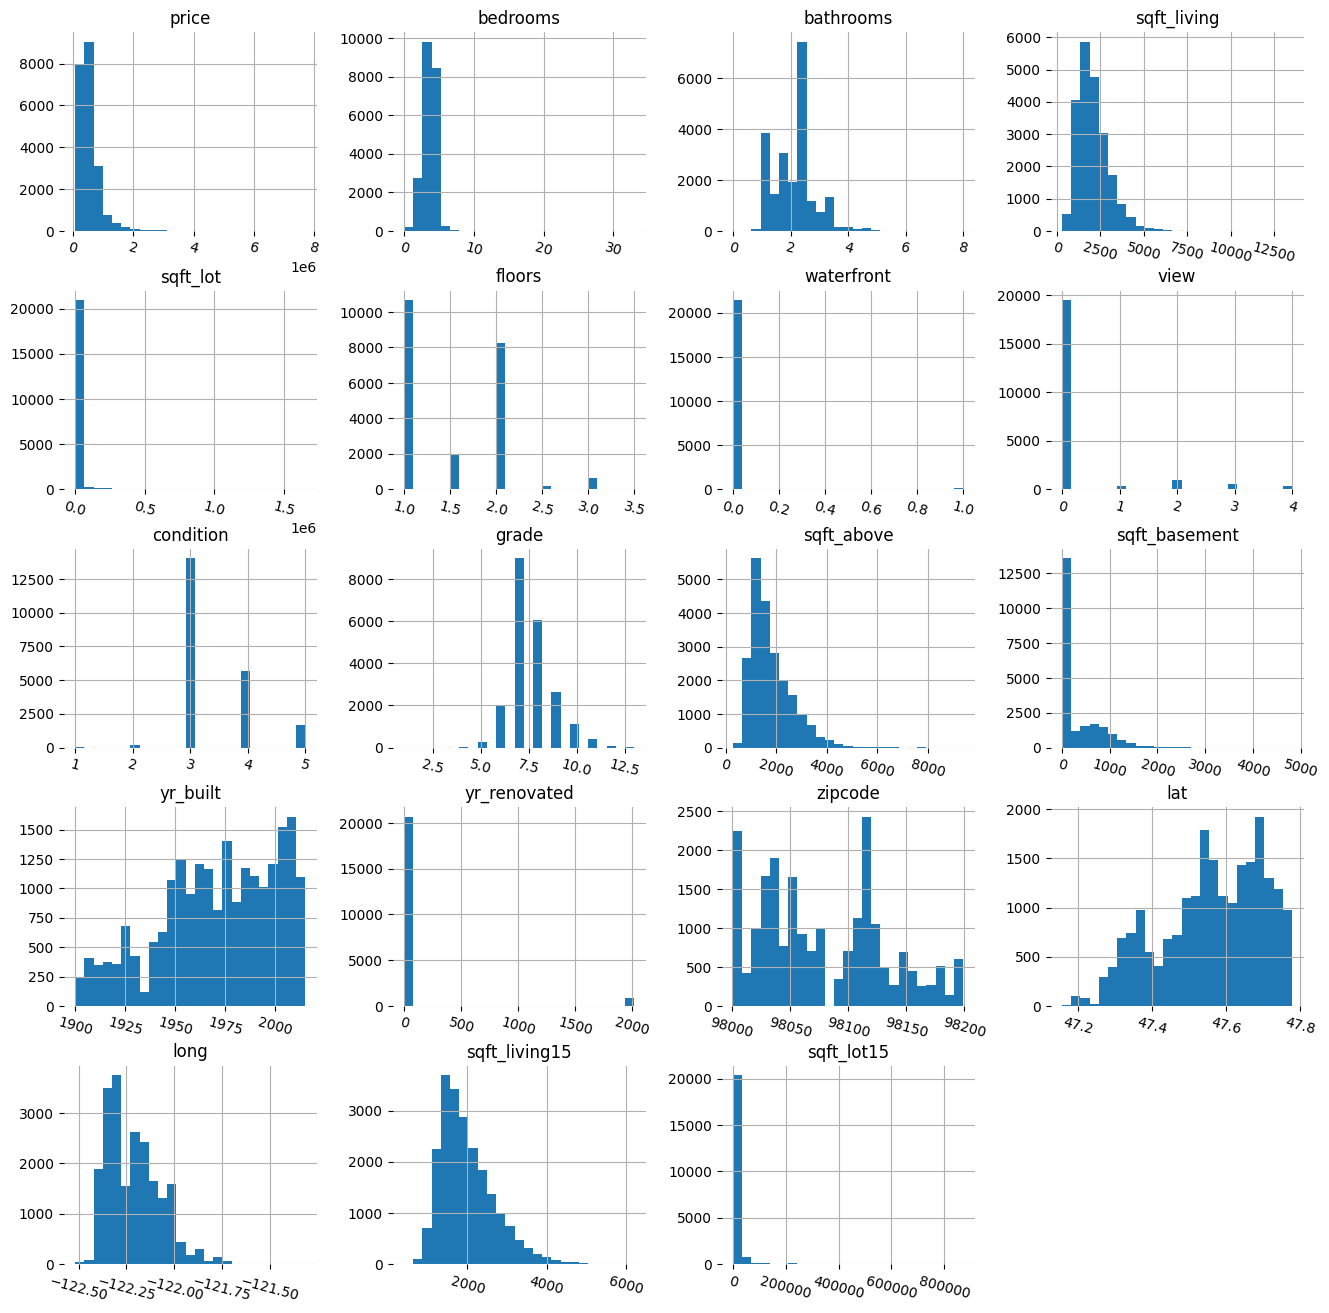

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de variables numéricas
df1=df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
    'lat', 'long', 'sqft_living15', 'sqft_lot15']]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];
plt.show()

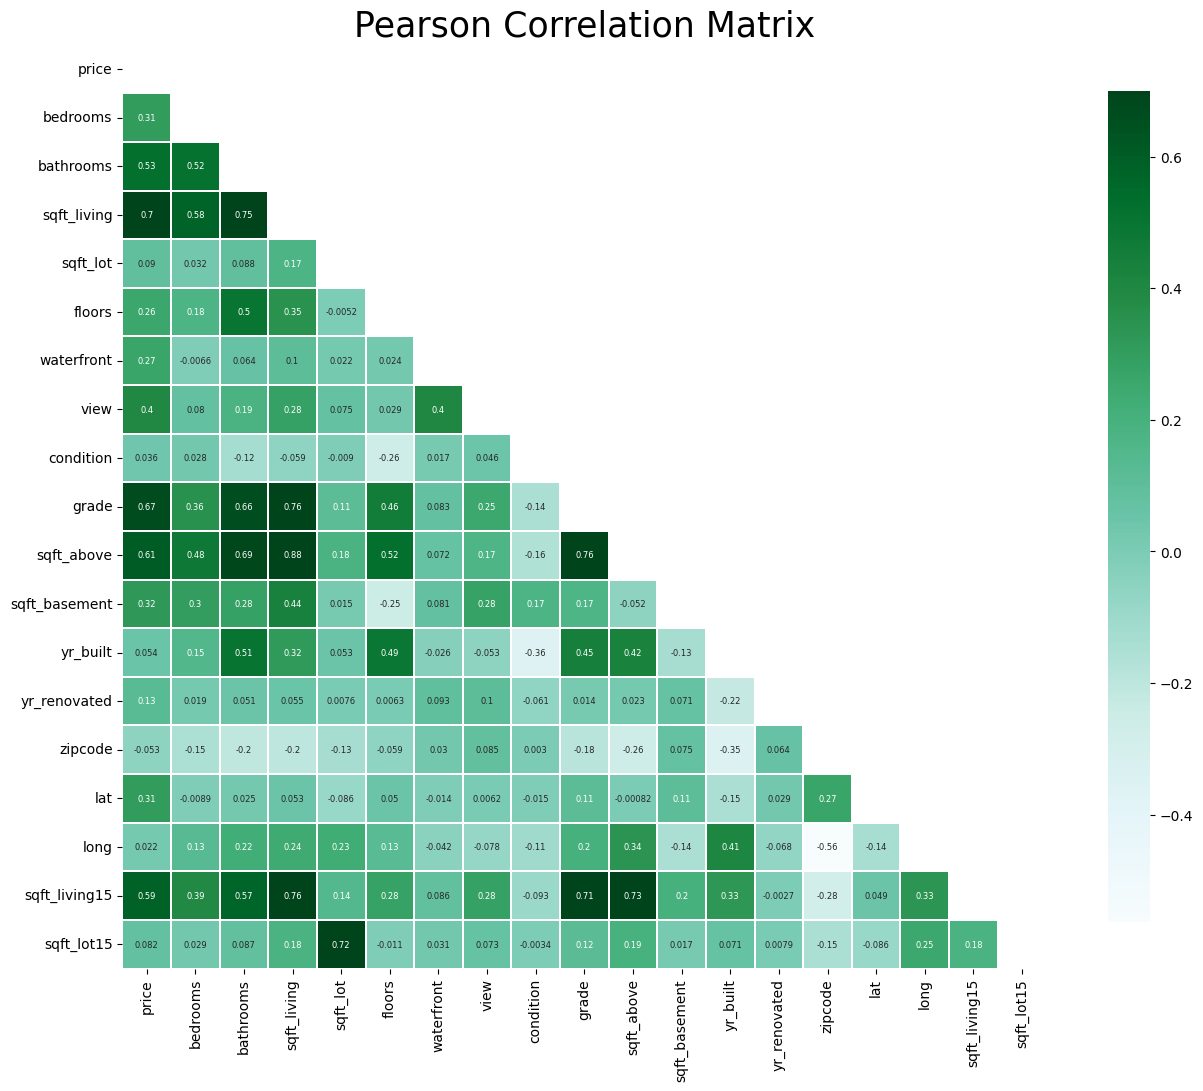

In [ ]:
# Matriz de correlacion

features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

mask = np.zeros_like(df[features].corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn",
            linecolor='w',annot=True,annot_kws={"size":6},mask=mask,cbar_kws={"shrink": .9});

El IQR es una medida estadística que representa la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). Los outliers se definen como los valores que están fuera del rango. Los valores fuera de este rango se consideran outliers.

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Diccionario para almacenar la cantidad de outliers de cada columna
outliers_count = {}

# Calcular outliers usando el método IQR
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Contar los valores que están fuera del rango [lower_bound, upper_bound]
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_count[col] = outliers.shape[0]

# Mostrar el resultado
print("Cantidad de outliers en cada columna numérica:")
print(outliers_count)

Cantidad de outliers en cada columna numérica:
{'id': 0, 'price': 1146, 'bedrooms': 546, 'bathrooms': 571, 'sqft_living': 572, 'sqft_lot': 2425, 'floors': 0, 'waterfront': 163, 'view': 2124, 'condition': 30, 'grade': 1911, 'sqft_above': 611, 'sqft_basement': 496, 'yr_built': 0, 'yr_renovated': 914, 'zipcode': 0, 'lat': 2, 'long': 256, 'sqft_living15': 544, 'sqft_lot15': 2194}


Otra forma de identificar outliers es utilizar la desviación estándar. Los valores que se encuentran a más de un cierto número de desviaciones estándar de la media (por ejemplo, 3 desviaciones estándar) suelen considerarse outliers

In [ ]:
outliers_count_std = {}

# Calcular outliers usando el método de desviación estándar
for col in numeric_columns:
    mean = df[col].mean()
    std_dev = df[col].std()
    lower_bound = mean - 3 * std_dev
    upper_bound = mean + 3 * std_dev

    # Contar los valores que están fuera del rango [lower_bound, upper_bound]
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_count_std[col] = outliers.shape[0]

# Mostrar el resultado
print("Cantidad de outliers en cada columna numérica (método de desviación estándar):")
print(outliers_count_std)


Cantidad de outliers en cada columna numérica (método de desviación estándar):
{'id': 0, 'price': 406, 'bedrooms': 75, 'bathrooms': 187, 'sqft_living': 248, 'sqft_lot': 347, 'floors': 8, 'waterfront': 163, 'view': 829, 'condition': 30, 'grade': 136, 'sqft_above': 254, 'sqft_basement': 247, 'yr_built': 0, 'yr_renovated': 914, 'zipcode': 0, 'lat': 0, 'long': 233, 'sqft_living15': 237, 'sqft_lot15': 363}


A continuación obtenemos los valores en porcentaje.

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Diccionario para almacenar la cantidad de outliers de cada columna
outliers_count = {}
total_records = len(df)

# Calcular outliers usando el método IQR
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Contar los valores que están fuera del rango [lower_bound, upper_bound]
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_count[col] = outliers.shape[0]

# Calcular el porcentaje de outliers para cada columna
outliers_percentage = {col: (count / total_records) * 100 for col, count in outliers_count.items()}

# Mostrar el resultado
print("Porcentaje de outliers en cada columna numérica:")
print(outliers_percentage)

Porcentaje de outliers en cada columna numérica:
{'id': 0.0, 'price': 5.302364317771711, 'bedrooms': 2.526257345116365, 'bathrooms': 2.6419284689770044, 'sqft_living': 2.6465553139314304, 'sqft_lot': 11.220099014482026, 'floors': 0.0, 'waterfront': 0.7541757275713691, 'view': 9.827418683199927, 'condition': 0.13880534863276733, 'grade': 8.841900707907278, 'sqft_above': 2.8270022671540276, 'sqft_basement': 2.2949150973950863, 'yr_built': 0.0, 'yr_renovated': 4.228936288344977, 'zipcode': 0.0, 'lat': 0.009253689908851155, 'long': 1.1844723083329478, 'sqft_living15': 2.517003655207514, 'sqft_lot15': 10.151297830009716}


Comparando los resultados del IQR con el método de desviación estándar, se observa que el método IQR identifica una cantidad significativamente mayor de outliers en la mayoría de las columnas.

### Interpretación de los Resultados

1. **Columnas sin Outliers (IQR y Desviación Estándar)**
   - `id`, `floors`, `yr_built`, `zipcode`: Estas columnas no presentan outliers según ambos métodos. Esto indica que los valores en estas columnas son bastante consistentes y no hay registros que se desvíen drásticamente de la mediana o la media.
   
2. **Columnas con Más Outliers en el Método IQR**
   - **`price`**: 1146 (vs. 406 en desviación estándar)  
   - **`sqft_lot`**: 2425 (vs. 347 en desviación estándar)
   - **`view`**: 2124 (vs. 829 en desviación estándar)
   - **`grade`**: 1911 (vs. 136 en desviación estándar)
   - **`sqft_lot15`**: 2194 (vs. 363 en desviación estándar)
   
   Estas columnas presentan muchos más outliers con el método IQR que con el método de desviación estándar. Esto indica que, en estas columnas, los valores extremos son muy diferentes de los valores intercuartílicos (Q1 y Q3), lo cual es característico de datos con distribuciones sesgadas o con colas largas. Los valores de `price`, `sqft_lot`, y `sqft_lot15`, en particular, suelen tener outliers porque los datos de bienes raíces tienden a tener algunas propiedades inusualmente caras o grandes en comparación con la mayoría.

3. **Columnas con una Cantidad Similar de Outliers en Ambos Métodos**
   - **`waterfront`**: 163 outliers en ambos métodos.
   - **`condition`**: 30 outliers en ambos métodos.
   - **`yr_renovated`**: 914 outliers en ambos métodos.

   Estos valores atípicos son consistentes entre los dos métodos, lo que sugiere que los outliers en estas columnas están claramente definidos y alejados de los valores centrales en ambas métricas (media y rango intercuartílico).

4. **Pequeñas Diferencias en el Número de Outliers entre los Métodos**
   - **`sqft_living`, `sqft_above`, `sqft_basement`, `bathrooms`, `bedrooms`**: Estas columnas muestran un número mayor de outliers con el método IQR que con desviación estándar, aunque no es una diferencia tan drástica como en los casos anteriores.
   Esto indica que las distribuciones de estas columnas también están algo sesgadas, pero no tan extremas como en las columnas de `price` y `sqft_lot`.

### Interpretación General

- **Distribución Asimétrica**: Los datos parecen no seguir una distribución normal en muchas columnas. Las grandes diferencias en el número de outliers entre el método IQR y el método de desviación estándar sugieren que las distribuciones son asimétricas o tienen colas largas.

## Eliminación de outliers


In [1]:
def eliminar_outliers_iqr(df, columnas, factor=1.5):
    for columna in columnas:
        # Calcular el primer y tercer cuartil
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1

        # Filtrar los datos dentro del rango de 1.5*IQR
        df = df[(df[columna] >= Q1 - factor * IQR) & (df[columna] <= Q3 + factor * IQR)]

    return df

# Lista de columnas numéricas en las que deseas eliminar outliers
columnas_numericas = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
df_sin_outliers = eliminar_outliers_iqr(df, columnas_numericas, factor=1.5)


NameError: name 'df' is not defined

Los siguientes gráficos se realizaron previo a la limpieza y feedback del laboratorio realizado el 9 de noviembre.

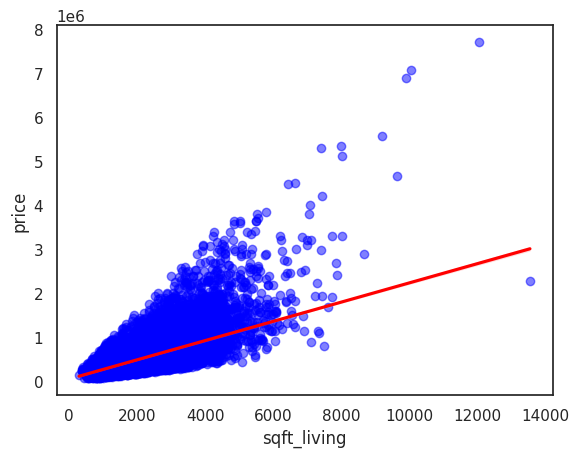

In [ ]:
sns.set(style="white", font_scale=1)
# Relación entre el precio y el tamaño de la casa
sns.regplot(x='sqft_living', y='price', data=df, robust=True,
            scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "red"})
plt.show()


[Text(0.5, 0, 'Floors'), Text(0, 0.5, 'Price')]

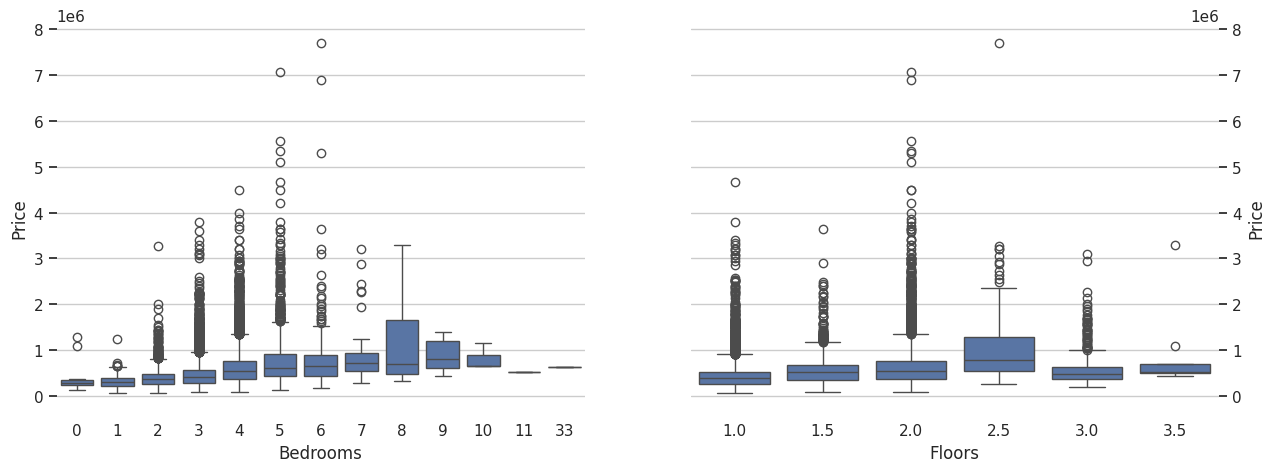

In [ ]:
# Relación entre el número de dormitorios, pisos y el precio

sns.set(style="whitegrid", font_scale=1)
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['bedrooms'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['floors'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Floors', ylabel='Price')

Ya que se cuenta con coordenadas (lat y long), es posible visualizar la distribución geográfica de los precios.

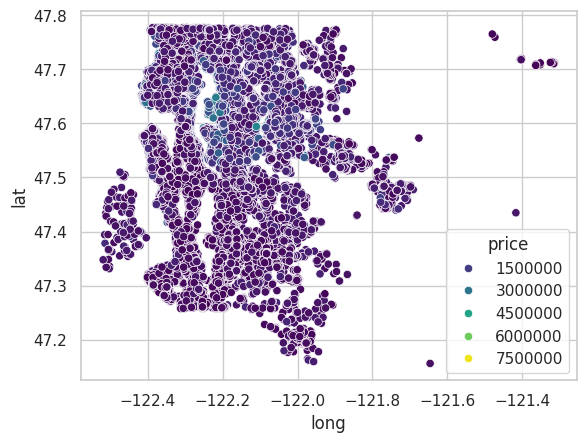

In [ ]:
# Distribución Geográfica de los precios
sns.scatterplot(x='long', y='lat', hue='price', data=df, palette='viridis')
plt.show()

In [ ]:
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# find the row of the house which has the highest price
maxpr=df.loc[df['price'].idxmax()]

# define a function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_copy = df.copy()
# select a zipcode for the heatmap
#set(df['zipcode'])
#df_copy = df[df['zipcode']==98001].copy()
df_copy['count'] = 1
basemap = generateBaseMap()
# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

Es posible analizar la antigüedad de las propiedades y si han sido renovadas.

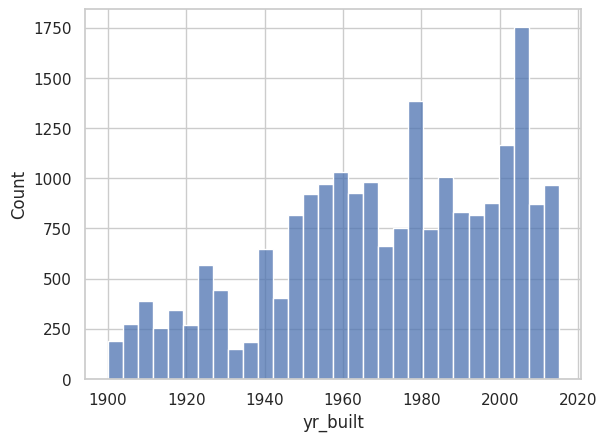

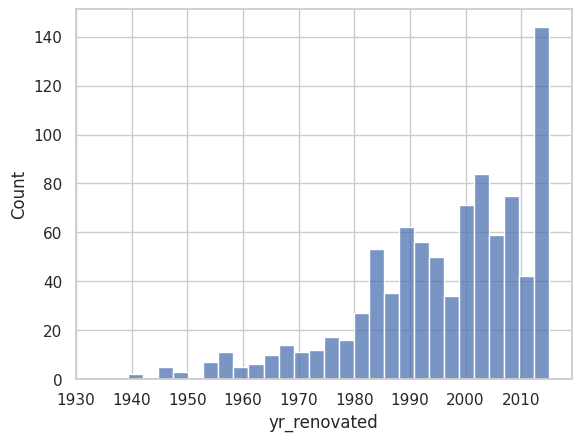

In [ ]:
# Distribución de años de construcción
sns.histplot(df['yr_built'], bins=30)
plt.show()

# Distribución de años de renovación (filtrando los que tienen renovaciones)
sns.histplot(df[df['yr_renovated'] > 0]['yr_renovated'], bins=30)
plt.show()


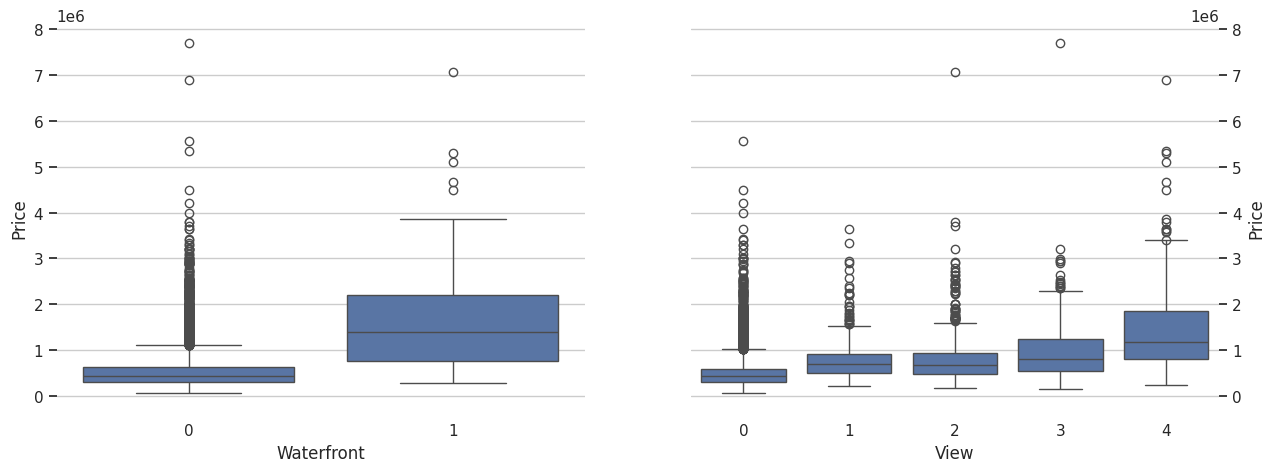

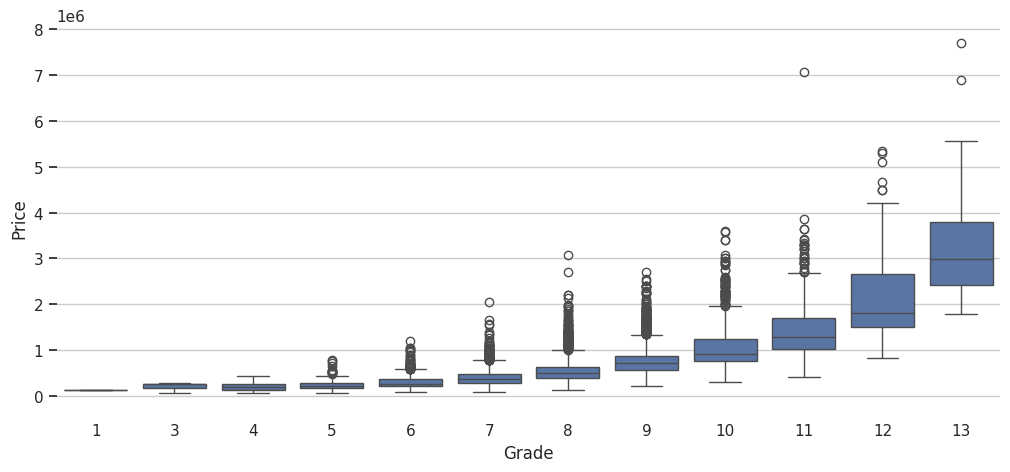

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['waterfront'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['view'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='View', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.boxplot(x=df['grade'],y=df['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.yaxis.tick_left()
axe.set(xlabel='Grade', ylabel='Price');

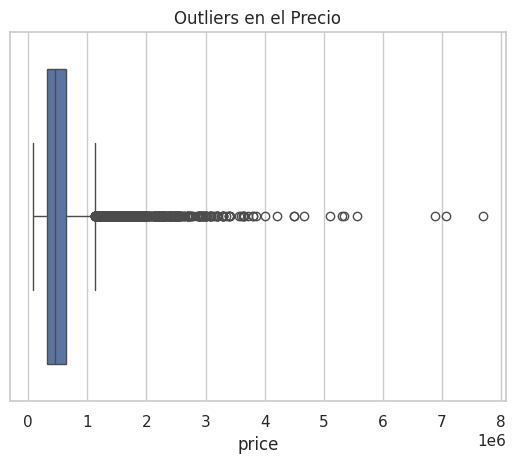

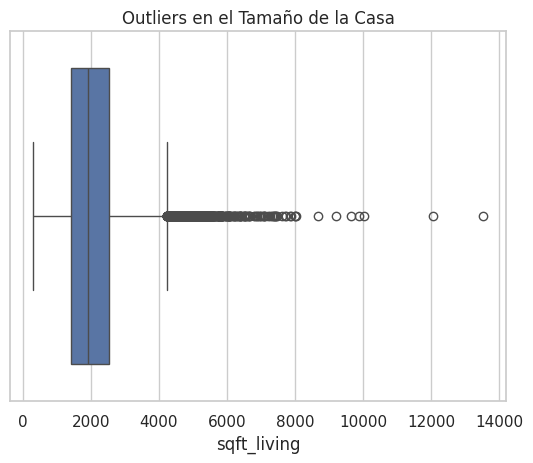

In [ ]:
#boxplot para ver los outliers en el precio
sns.boxplot(x=df['price'])
plt.title('Outliers en el precio')
plt.show()

#boxplot para ver los outliers en el tamaño de la casa
sns.boxplot(x=df['sqft_living'])
plt.title('Outliers en el tamaño de la casa')
plt.show()

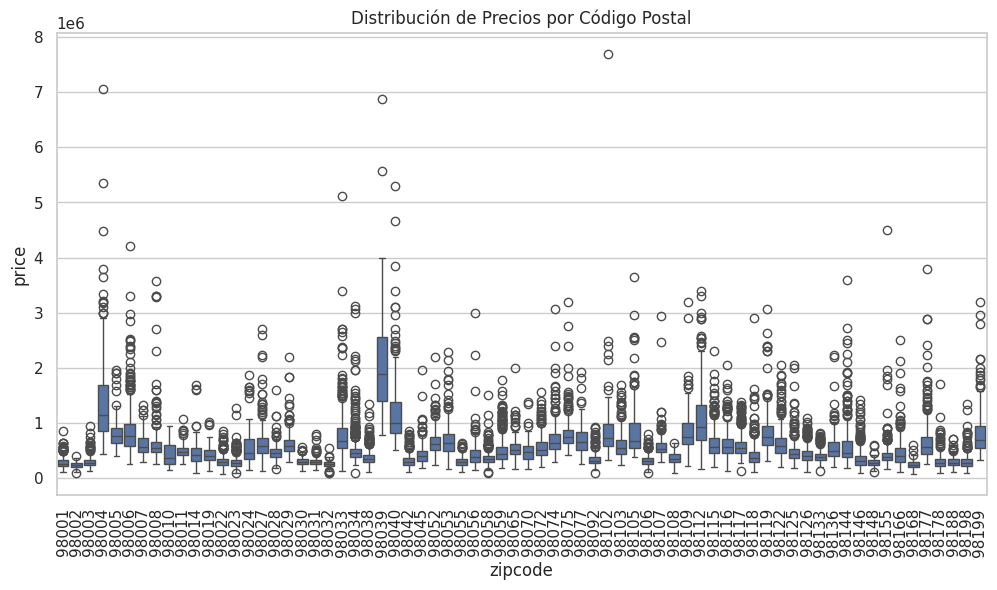

In [ ]:
#boxplot para la distribución de precios por zona postal
plt.figure(figsize=(12,6))
sns.boxplot(x='zipcode', y='price', data=df)
plt.title('Distribución de Precios por código postal')
plt.xticks(rotation=90)
plt.show()


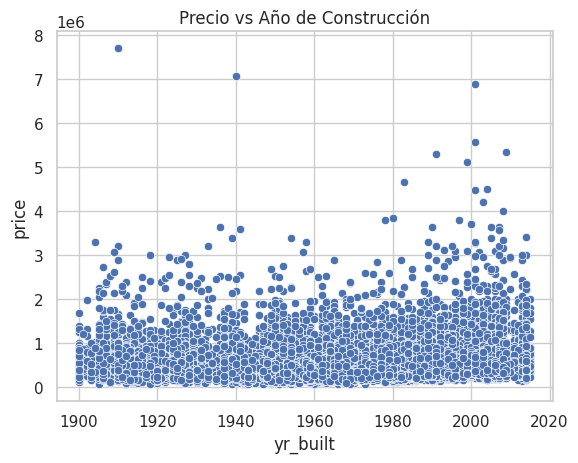

In [ ]:
# Precio vs año de construcción
sns.scatterplot(x='yr_built', y='price', data=df)
plt.title('Precio vs Año de Construcción')
plt.show()
##revisar